## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## Regularizers = L1

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""
Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer L1 = %.12f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer L1 = 0.010000000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.9807 - acc: 0.2828 - val_loss: 5.7968 - val_acc: 0.3539
Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 5.7079 - acc: 0.3685 - val_loss: 5.6257 - val_acc: 0.3865
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 5.5625 - acc: 0.3989 - val_loss: 5.4992 - val_acc: 0.4119
Epoch 4/50
50000/50000 [==============================] - 3s 53us/step - loss: 5.4434 - acc: 0.4179 - val_loss: 5.3935 - val_acc: 0.4208
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 5.3362 - acc: 0.4340 - val_loss: 5.3020 - val_acc: 0.4328
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 5.2350 - acc: 0.4452 - val_loss: 5.1935 - val_acc: 0.4441
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 5.1410 - acc: 0.4556 - val_loss: 5.1116 - val_acc

50000/50000 [==============================] - 3s 58us/step - loss: 1.8108 - acc: 0.3621 - val_loss: 1.7666 - val_acc: 0.3791
Epoch 3/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7306 - acc: 0.3925 - val_loss: 1.7002 - val_acc: 0.4044
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6718 - acc: 0.4149 - val_loss: 1.6502 - val_acc: 0.4223
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6225 - acc: 0.4313 - val_loss: 1.6267 - val_acc: 0.4342
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5817 - acc: 0.4462 - val_loss: 1.5774 - val_acc: 0.4429
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5476 - acc: 0.4558 - val_loss: 1.5473 - val_acc: 0.4531
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5173 - acc: 0.4684 - val_loss: 1.5451 - val_acc: 0.4541
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 62us/step - loss: 1.7242 - acc: 0.3962 - val_loss: 1.7008 - val_acc: 0.3977
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6639 - acc: 0.4170 - val_loss: 1.6431 - val_acc: 0.4256
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6182 - acc: 0.4344 - val_loss: 1.6031 - val_acc: 0.4375
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5797 - acc: 0.4488 - val_loss: 1.5867 - val_acc: 0.4407
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5461 - acc: 0.4589 - val_loss: 1.5601 - val_acc: 0.4562
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5172 - acc: 0.4681 - val_loss: 1.5284 - val_acc: 0.4676
Epoch 9/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4903 - acc: 0.4770 - val_loss: 1.5112 - val_acc: 0.4603
Epoch 10/50
50000/50000 [===========================

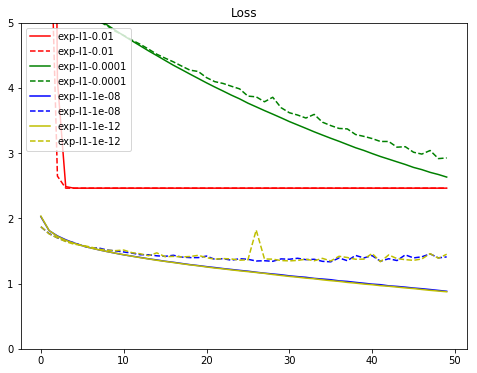

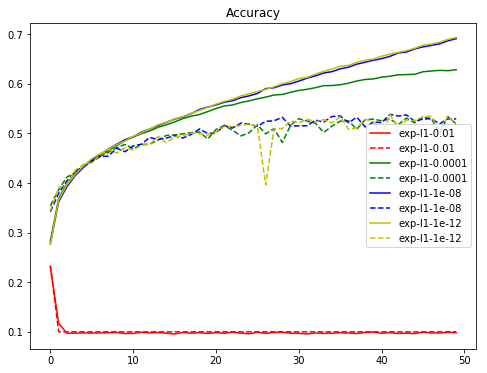

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Regularizers = L1_L2

In [9]:
from keras.regularizers import l1, l2, l1_l2

"""
Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer L1_L2 = %.12f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer L1_L2 = 0.010000000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 67us/step - loss: 18.8063 - acc: 0.2551 - val_loss: 17.3580 - val_acc: 0.3191
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 16.1366 - acc: 0.3498 - val_loss: 14.9772 - val_acc: 0.3620
Epoch 3/50
50000/50000 [==============================] - 3s 64us/step - loss: 13.9513 - acc: 0.3730 - val_loss: 12.9691 - val_acc: 0.3777
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 12.1028 - acc: 0.3876 - val_loss: 11.2690 - val_acc: 0.3881
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 10.5334 - acc: 0.3963 - val_loss: 9.8240 - val_acc: 0.3939
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 9.1985 - acc: 0.4040 - val_loss: 8.5983 - val_acc: 0.4097
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 8.0595 - acc: 0.4112 - val_loss: 7.5499 

50000/50000 [==============================] - 3s 60us/step - loss: 13.0062 - acc: 0.3597 - val_loss: 12.1152 - val_acc: 0.3700
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 11.3376 - acc: 0.3798 - val_loss: 10.5920 - val_acc: 0.3858
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 9.9274 - acc: 0.3973 - val_loss: 9.2886 - val_acc: 0.4015
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 8.7289 - acc: 0.4050 - val_loss: 8.1850 - val_acc: 0.4099
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 7.7049 - acc: 0.4154 - val_loss: 7.2569 - val_acc: 0.4088
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 6.8341 - acc: 0.4226 - val_loss: 6.4365 - val_acc: 0.4244
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 6.0885 - acc: 0.4272 - val_loss: 5.7518 - val_acc: 0.4332
Epoch 9/50
50000/50000 [========================

50000/50000 [==============================] - 3s 57us/step - loss: 11.3430 - acc: 0.3799 - val_loss: 10.5938 - val_acc: 0.3840
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 9.9308 - acc: 0.3938 - val_loss: 9.2902 - val_acc: 0.4044
Epoch 5/50
50000/50000 [==============================] - 3s 66us/step - loss: 8.7273 - acc: 0.4074 - val_loss: 8.1824 - val_acc: 0.4133
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 7.7036 - acc: 0.4157 - val_loss: 7.2414 - val_acc: 0.4171
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 6.8312 - acc: 0.4225 - val_loss: 6.4425 - val_acc: 0.4213
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 6.0866 - acc: 0.4281 - val_loss: 5.7515 - val_acc: 0.4287
Epoch 9/50
50000/50000 [==============================] - 3s 59us/step - loss: 5.4508 - acc: 0.4331 - val_loss: 5.1707 - val_acc: 0.4304
Epoch 10/50
50000/50000 [=========================

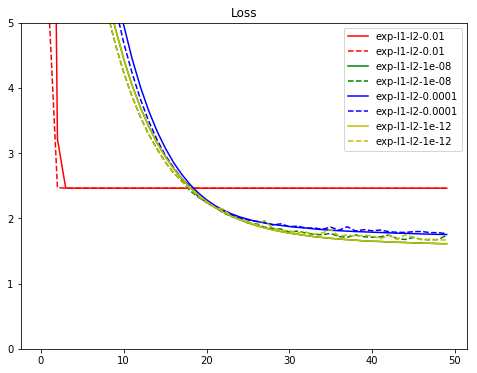

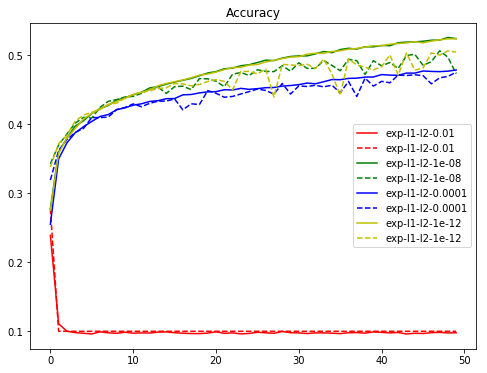

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()